In [5]:
import tensorflow as tf
import os 
import collections

# Load
path = '/home/ramos/work/PhiFlow/myscripts/network/storage/'
runs_folders = [folder for folder in os.listdir(path) if '.' not in folder]
validations =  collections.defaultdict(list)
for folder in runs_folders:
    event_path = path + folder + '/tensorboard/scalars/validation_loss/' + os.listdir(path + folder + '/tensorboard/scalars/validation_loss/')[0]
    [run_key, id] = folder.split('_id_')
    values = []
    for e in tf.train.summary_iterator(event_path):
        for v in e.summary.value: values.append(v.simple_value)
    validations[run_key] += [values[-1]]

Created plot figure with data from w_1_0-min-max 
[[0], [0.43100233674049376]]
Created plot figure with data from w_1_0-mean 
Created plot figure with data from pure_data-min-max 
[[1], [0.4443489611148834]]
Created plot figure with data from pure_data-mean 


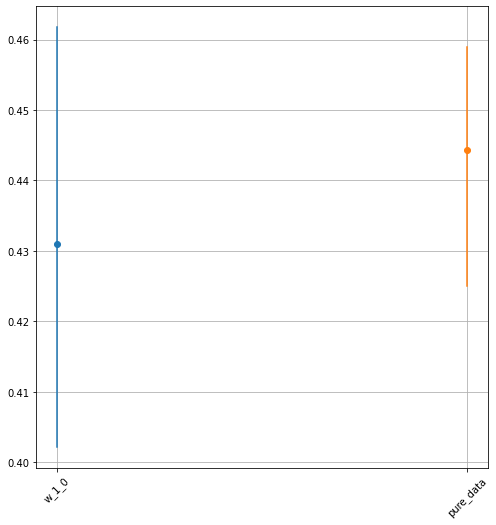

In [6]:
import numpy as np 
from plotter import Plotter

plotter = Plotter() 
x = 0
x_tick_labels = []
for key, values in validations.items():    
        max = np.max(values) 
        min = np.min(values) 
        mean = np.mean(values)
        line = [[x, x],[min, max]]
        dot = [[x], [mean]]
        # Plot 
        color = next(plotter.colors)
        x_tick_labels += [key]
        plotter.add_data([line, dot], [key + '-min-max', key + '-mean' ])
        plotter.plot([key + '-min-max'], 'plot', color = color, create_legend = False)
        print(dot)
        fig, ax = plotter.plot([key + '-mean'], 'plot', color = color, marker = 'o', linestyle = '', create_legend = False)        
        x += 1 
ax.set_xticks(range(x))
ax.set_xticklabels(x_tick_labels, rotation=45)
ax.grid()